**If you lost points on the last checkpoint you can get them back by responding to TA/IA feedback**  

Update/change the relevant sections where you lost those points, make sure you respond on GitHub Issues to your TA/IA to call their attention to the changes you made here.

Please update your Timeline... no battle plan survives contact with the enemy, so make sure we understand how your plans have changed.

# COGS 108 - Data Checkpoint

# Names

- Vishnu Babu Guturu
- Karthik Sankaran
- Shaan Bhakta
- Orlev Kuknariev
- Akshat Alurkar

# Research Question

How do player statistics (club, position, nationality, age, wins, losses, goals, assists, shooting accuracy, tackle success percentage, duels won, successful 50-50s, assists, passes per match, big chances created) affect soccer player market value among Premier League Midfielders from 2017-2020?
- Which statistics are the best measures of value?
- Can we generalize those statistics to predict player value based on their statistics?

## Background and Prior Work

Soccer, like most other sports, is incredibly data driven. However, unlike other sports, many of the characteristics of a good player are hard to explain by simple statistics. Unlike basketball where dropping 0 points as a superstar player most certainly means you had a bad game, a soccer superstar scoring 0 goals doesn’t necessarily mean they had a bad game. For this reason our team is trying to figure out if there is some commonly used and available statistic (or combination of stats.) that can help determine a player’s market value or quality. 

Some members of our group watch soccer heavily. The article "Decoding TransfrMarket: Analyzing Player Values Versus Player Performance"<a name="cite_ref-1"></a>[<sup>1</sup>](#cite_note-1) reaffirms many of our opinions of how market value is influenced. This article analyzes how well soccer players’ Transfermarkt values reflect their on-field performance, focusing on the 2023–2024 Premier League season. By comparing player ratings from WhoScored and key performance metric like goals, passes, and interception with their market value, the author finds a generally positive correlation between better performance and higher valuations. However, positional differences are significant. Attackers are valued for scoring and key passes, midfielders for dribbling and long balls, and defenders for consistency and accurate passing rather than tackles. Younger players tend to be more expensive. These findings from a sports analytics club at Berkeley reflect what we also believe as a team. One more idea I would like to set forth is that the club and nation a player is from tends to overinflate their value. For example, there is a phenomenon in soccer known informally as the “Brazil/inho Tax” where Brazilian players are held to higher standards than other nationalities because of their nation's pedigree in the sport and are thus, valued higher. People often joke that Manchester City right winger Savinho’s nickname change from Savio to Savinho (a more Brazilian sounding name) had the effect of increasing his transfer fee by $10 million. 

One github repo that demonstrates a similar concept(but highly complicated) is: Football-Player-Market-Value-Prediction<a name="cite_ref-2"></a>[<sup>2</sup>](#cite_note-2)

This project focuses on predicting the market value of professional football players using machine learning techniques. Data was collected through web scraping with BeautifulSoup in Python from two websites, covering over 20 tables and resulting in a dataset of 350+ players from top leagues such as the Premier League, La Liga, Bundesliga, Serie A, and Ligue 1. The statistics that the author used were a superset of the ones we are trying to work with with a few exceptions. After cleaning and transforming the data, multiple models were tested, with the Random Forest Regressor achieving the best performance at around 90% accuracy and a 5% error margin. The project used preprocessing methods in outlier detection and null value handling while demonstrating results using incredibly detailed visualizations.

These prior works are helpful to our project because they establish a proof of concept and show feasibility of predicting player market value using available performance metrics and qualitative factors. The Transfermarkt analysis reinforces the idea that while statistics like goals, assists, and passes are important, market value is also heavily influenced by other factors like a player's position, age, and even their nationality or club affiliation. This information encourages us to embrace a more multifactorial approach to analysis.  Meanwhile, the GitHub project provides a blueprint for how such a predictive model can be constructed, from data collection and preprocessing to model selection and evaluation. Although the model used in that project is more complex, it offers us a useful benchmark for what can be achieved and motivates us to pursue a model that balances interpretability and intuitiveness with predictive power.

1. <a name="cite_note-1"></a> [^](#cite_ref-1) Wang, Ethan. (16 May 2024) Decoding TransfrMarket: Analyzing Player Values Versus Player Performance. *Sports Analytics Group Berkeley*. https://sportsanalytics.studentorg.berkeley.edu/articles/transfer-values.html 
2. <a name="cite_note-2"></a> [^](#cite_ref-2) Github Repository by akarshsinghh. https://github.com/akarshsinghh/Football-Player-Market-Value-Prediction


# Hypothesis


We predict a strong positive correlation between a player's market value and their age (specifically younger age), number of goals, assists, and big chances created. These metrics reflect offensive productivity and creativity, which are highly valued traits in modern soccer. We also anticipate that goals and big chances created will show the strongest correlations with market value, as these directly contribute to a team's success and are often used to evaluate a player's impact.

Our prediction is based on observed trends in the soccer transfer market, where young attacking players, particularly those who consistently contribute to goal, scoring opportunities, tend to command higher market values. In contrast, older players or those in primarily defensive roles typically have lower market values due to perceived lower resale value and shorter remaining career longevity.



# Data

For our research question, the ideal dataset would be a single player-season table spanning every Premier-League campaign, with one row per player per season and columns for demographics & context (age, nationality, position, club), attacking and defensive statistics (goals, assists, big-chances created, shooting accuracy, passes per match, tackle-success %, duels and 50-50s won, etc.), and three target variables: market value, FPL value, and FPL points. Because no public file contains all of that, we will merge two complementary kaggle sources:

1. Dataset Name: English Premier League Players Statistics
   
> Link to the dataset: https://www.kaggle.com/code/desalegngeb/english-premier-league-players-statistics/input

> Number of observations: 571 player-season rows (2019-20 EPL)

> Description: Contains the full box-score feature set we need—club, position, nationality, age, wins, losses, goals, assists, shooting-accuracy, tackle-success %, duels won, successful 50-50s, passes per match, and big chances created. This file supplies all explanatory variables and will be read into a pandas DataFrame.

2. Dataset Name: 2017-2019_players.csv
   
> Link to the dataset: https://github.com/akarshsinghh/Football-Player-Market-Value-Prediction/blob/main/Final.xlsx

> Number of observations: 560 player rows (2017-19 Football stats)

> Description: Contains Name, Value, Nationality, Position, Club, League, Age, Matches played, Matches started, Minutes played, Goals, Assists, Penalty goals, Penalty attempts, Goals per 90 mins, Assists per 90 mins, Goals + assists, Goals + assists, Penalty goals, Penalty attempts, Shots, Shots on target, Shot accuracy %, Shots per 90 mins, Shots on target per 90 mins, Goals per shot, Goals per shot on target, Tackles, Tackles won, Tackled, Tackle success %, Pressures, Successful pressures, Pressure success %, Blocks, Interceptions,  Completed passes, Attempted passes, Pass completion %, Touches, Successful pressures, Attempts, Success %, Players involved. This file is quite handy for our group becomes it actually contains market value data and removes the need to manually enter market values for players. A drawback of this dataset is that it doesn't contain an ideal amount of EPL midfielders as we would want and it serves as a data bottleneck.

However, one problem these datasets pose is that they account for a span of 3 seasons. Due to data availability and variable consistency reasons, we will be working on these three seasons for now as we look for more datasets that include other seasons. As we find more data from different seasons, we will integrate the relevant data. To resolve inconsistencies across datasets where one may contain multiple seasons and the other contains a single one, we will scale the data columns according to the largest dataset (i.e doubling single season dataset values that are not percentage/per statistics). If we see a large discrepancy between the season which market value is observed in and the actual seasons in observance, we will resort to manually entering market value statistics.

## Dataset English Premier League Players Statistics

In [69]:
## YOUR CODE TO LOAD/CLEAN/TIDY/WRANGLE THE DATA GOES HERE
## FEEL FREE TO ADD MULTIPLE CELLS PER SECTION 

import pandas as pd

player_stats = pd.read_csv("player_stats.csv")

player_stats = player_stats[player_stats["Position"].str.contains("Midfielder", case=False, na=False)].copy()
player_stats.reset_index(drop=True, inplace=True)

redundant_cols_w_17_19_drop = [
    "Club",
    "Position",
    "Nationality",
    "Age",
    "Appearances",      
    "Goals",
    "Goals per match", 
    "Penalties scored",
    "Tackles",
    "Interceptions",
    "Clearances",
    "Assists",
    "Passes",        
]

irrelevant_cols_to_drop = [
    'Jersey Number', 'Headed goals',
    'Goals with right foot', 'Goals with left foot', 'Freekicks scored',
    'Hit woodwork', 'Big chances missed', 'Clean sheets', 'Goals conceded',
    'Last man tackles', 'Blocked shots', 'Headed Clearance', 'Clearances off line',
    'Recoveries', 'Own goals', 'Errors leading to goal', 'Cross accuracy %',
    'Through balls', 'Saves', 'Penalties saved', 'Punches', 'High Claims',
    'Catches', 'Sweeper clearances', 'Throw outs', 'Goal Kicks',
    'Yellow cards', 'Red cards', 'Fouls', 'Offsides'
]

# Drop them from your DataFrame (no error if a column is missing)
player_stats.drop(columns=cols_to_drop, inplace=True, errors='ignore')

# 3) Drop them if present
player_stats = player_stats.drop(columns=[c for c in to_drop if c in player_stats.columns], errors="ignore")
player_stats_names = player_stats["Name"].tolist()

numeric_cols = player_stats.select_dtypes(include='number').columns
cols_to_double = [
    col for col in numeric_cols
    if '%' not in col and 'per' not in col.lower()
]

# 2) Double their values in-place
player_stats[cols_to_double] = player_stats[cols_to_double] * 2

player_stats

,Name,Wins,Losses,Shots,Shots on target,Shooting accuracy %,Tackle success %,Duels won,Duels lost,Successful 50/50s,Aerial battles won,Aerial battles lost,Passes per match,Big chances created,Crosses,Accurate long balls
0,Mesut Özil,200,78,410.0,184.0,45%,68%,1250.0,1488.0,496.0,56.0,166.0,60.79,130.0,1668.0,552.0
1,Lucas Torreira,56,30,92.0,24.0,26%,57%,552.0,424.0,60.0,64.0,94.0,39.57,6.0,80.0,188.0
2,Ainsley Maitland-Niles,52,32,28.0,8.0,29%,62%,436.0,414.0,116.0,58.0,76.0,34.57,8.0,114.0,148.0
3,Mohamed Elneny,58,20,88.0,10.0,11%,54%,218.0,214.0,22.0,36.0,68.0,53.87,4.0,60.0,166.0
4,Joseph Willock,24,24,36.0,10.0,28%,60%,150.0,152.0,42.0,18.0,36.0,12.06,2.0,18.0,30.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
193,Romain Saïss,48,32,76.0,30.0,39%,68%,652.0,450.0,26.0,372.0,212.0,45.43,8.0,36.0,416.0
194,João Moutinho,64,46,80.0,18.0,23%,52%,680.0,810.0,56.0,86.0,140.0,48.44,32.0,844.0,562.0
195,Leander Dendoncker,52,30,74.0,30.0,41%,47%,656.0,542.0,56.0,316.0,276.0,33.32,4.0,32.0,162.0
196,Vitinha,2,0,0.0,0.0,0%,0%,2.0,0.0,2.0,0.0,0.0,5.00,0.0,0.0,0.0


## Dataset 2017-2019_players.csv

In [70]:
import pandas as pd

# Load the csv file
player_stats_17_19 = pd.read_csv('2017-2019_players.csv')

# Drop unnamed index columns
player_stats_17_19 = player_stats_17_19.loc[:, ~player_stats_17_19.columns.str.contains('^Unnamed')]

# Rename columns to fix typos and standardize
player_stats_17_19.rename(columns={'Leauge': 'League', 'Pos': 'Position'}, inplace=True)

# Fix typo in data
player_stats_17_19['League'] = player_stats_17_19['League'].replace({'Premier Leauge': 'Premier League'})

# Filter for EPL players
player_stats_17_19 = player_stats_17_19[player_stats_17_19['League'].str.contains('Premier League', case=False, na=False)]

# Filter for midfielders
player_stats_17_19 = player_stats_17_19[player_stats_17_19['Position'].str.contains('MF', na=False)]

# Convert 'Market value' from string to float
def parse_market_value(value):
    if isinstance(value, str):
        value = value.replace('€', '').replace('m', '')
        try:
            return float(value)
        except:
            return None
    return value

player_stats_17_19['Market value'] = player_stats_17_19['Market value'].apply(parse_market_value)

# Reset index after filtering
player_stats_17_19.reset_index(drop=True, inplace=True)

# Standardize column names
player_stats_17_19.columns = player_stats_17_19.columns.str.strip().str.lower().str.replace(' ', '_')

# Keep only relevant columns
columns_to_keep = [
    'player', 'market_value', 'nation', 'position', 'club_x', 'league', 'age',
    'mp', 'starts', 'min', 'gls', 'ast', 'pk', 'pkatt', 'gls90', 'ast90', 'g+a',
    'passes_completed', 'passes_attempted', 'cmp%', 'touches',
    'tackle', 'press', 'succ_x', 'blocks', 'int', 'clr'
]
player_stats_17_19 = player_stats_17_19[columns_to_keep]

# Rename columns to non-abbreviated, readable names
player_stats_17_19.rename(columns={
    'player': 'player_name',
    'market_value': 'market_value_million_eur',
    'nation': 'nationality',
    'position': 'position',
    'club_x': 'club',
    'league': 'league',
    'age': 'age',
    'mp': 'matches_played',
    'starts': 'starts',
    'min': 'minutes_played',
    'gls': 'goals',
    'ast': 'assists',
    'pk': 'penalty_goals',
    'pkatt': 'penalty_attempts',
    'gls90': 'goals_per_90',
    'ast90': 'assists_per_90',
    'g+a': 'goals_plus_assists',
    'passes_completed': 'passes_completed',
    'passes_attempted': 'passes_attempted',
    'cmp%': 'pass_completion_pct',
    'touches': 'touches',
    'tackle': 'tackles',
    'press': 'pressures',
    'succ_x': 'successful_pressures',
    'blocks': 'blocks',
    'int': 'interceptions',
    'clr': 'clearances'
}, inplace=True)

player_stats_17_19.rename(columns={'player_name': 'Name'}, inplace=True)

merged_df = pd.merge(player_stats, player_stats_17_19, on="Name", how="inner")

# Drop duplicates
merged_df = player_stats_17_19.drop_duplicates(subset="Name", keep="first")


In [71]:
# Compute correlation matrix
correlation_matrix = merged_df.corr(numeric_only=True)

# Correlation with market value
market_value_corr = correlation_matrix['market_value_million_eur'].drop('market_value_million_eur')

# Get top 10 features most positively or negatively correlated with market value
top_10_corr = market_value_corr.abs().sort_values(ascending=False).head(10)

# Display the top 10 correlations with direction
most_correlated_stats = market_value_corr.loc[top_10_corr.index]
print(most_correlated_stats)

penalty_attempts        0.462313
assists                 0.458515
passes_attempted        0.456608
passes_completed        0.448972
touches                 0.447312
goals                   0.422518
penalty_goals           0.414930
assists_per_90          0.381598
successful_pressures    0.368581
goals_plus_assists      0.346172
Name: market_value_million_eur, dtype: float64


/var/folders/mv/6cp838093p3_l7jhbtxc3n2r0000gn/T/ipykernel_30145/3339138896.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_corr_df.values, y=top_corr_df.index, palette="colorblind")


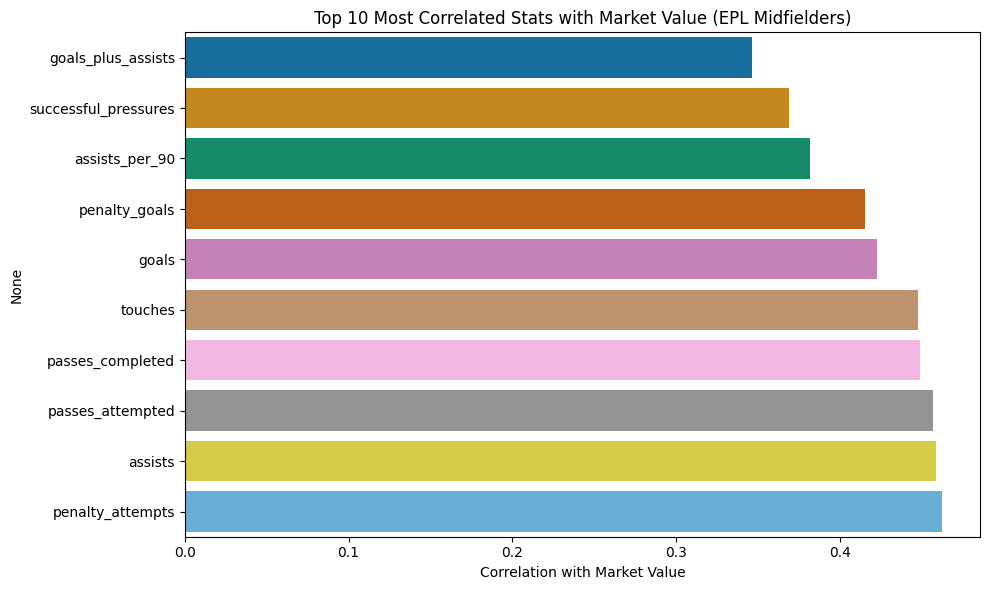

In [92]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Assuming most_correlated_stats is a Series of correlations
top_corr_df = most_correlated_stats.sort_values(ascending=True)  # sort ascending for barplot y-axis

plt.figure(figsize=(10, 6))
sns.barplot(x=top_corr_df.values, y=top_corr_df.index, palette="colorblind")

plt.xlabel('Correlation with Market Value')
plt.title('Top 10 Most Correlated Stats with Market Value (EPL Midfielders)')
plt.tight_layout()
plt.show()


In [91]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 63 entries, 0 to 64
Data columns (total 27 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Name                      63 non-null     object 
 1   market_value_million_eur  63 non-null     float64
 2   nationality               63 non-null     object 
 3   position                  63 non-null     object 
 4   club                      63 non-null     object 
 5   league                    63 non-null     object 
 6   age                       63 non-null     float64
 7   matches_played            63 non-null     float64
 8   starts                    63 non-null     float64
 9   minutes_played            63 non-null     float64
 10  goals                     63 non-null     float64
 11  assists                   63 non-null     float64
 12  penalty_goals             63 non-null     float64
 13  penalty_attempts          63 non-null     float64
 14  goals_per_90     

In [74]:
merged_df.describe(include='all')

,Name,market_value_million_eur,nationality,position,club,league,age,matches_played,starts,minutes_played,...,passes_completed,passes_attempted,pass_completion_pct,touches,tackles,pressures,successful_pressures,blocks,interceptions,clearances
count,63,63.000000,63,63,63,63,63.000000,63.000000,63.00000,63.000000,...,63.000000,63.000000,63.000000,63.000000,63.000000,63.000000,63.000000,63.000000,63.000000,63.000000
unique,63,NaN,21,3,18,1,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,Kevin De Bruyne,NaN,ENG,MF,Tottenham,Premier League,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,NaN,21,36,7,63,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,33.436508,NaN,NaN,NaN,NaN,23.539683,46.825397,37.68254,3341.238095,...,1613.571429,1960.539683,80.863492,2402.968254,71.349206,794.730159,212.063492,58.015873,39.603175,42.412698
std,NaN,20.294702,NaN,NaN,NaN,NaN,2.798764,15.584877,17.40488,1480.659604,...,954.908334,1092.674284,5.954337,1222.474829,47.927418,383.531729,107.426625,31.631697,31.602644,39.019695
min,NaN,16.000000,NaN,NaN,NaN,NaN,17.000000,7.000000,5.00000,386.000000,...,101.000000,142.000000,66.700000,236.000000,8.000000,130.000000,33.000000,7.000000,4.000000,3.000000
25%,NaN,19.500000,NaN,NaN,NaN,NaN,22.000000,36.500000,26.50000,2468.000000,...,892.000000,1131.500000,76.620000,1480.500000,33.500000,492.000000,127.000000,32.500000,17.500000,14.500000
50%,NaN,27.000000,NaN,NaN,NaN,NaN,23.000000,50.000000,39.00000,3569.000000,...,1471.000000,1819.000000,81.820000,2268.000000,63.000000,805.000000,213.000000,53.000000,35.000000,28.000000
75%,NaN,40.250000,NaN,NaN,NaN,NaN,26.000000,59.500000,52.50000,4459.000000,...,2298.500000,2769.500000,85.225000,3356.500000,99.500000,1033.000000,274.000000,81.500000,52.000000,58.500000


In [75]:
merged_df.isnull().sum()


Name                        0
market_value_million_eur    0
nationality                 0
position                    0
club                        0
league                      0
age                         0
matches_played              0
starts                      0
minutes_played              0
goals                       0
assists                     0
penalty_goals               0
penalty_attempts            0
goals_per_90                0
assists_per_90              0
goals_plus_assists          0
passes_completed            0
passes_attempted            0
pass_completion_pct         0
touches                     0
tackles                     0
pressures                   0
successful_pressures        0
blocks                      0
interceptions               0
clearances                  0
dtype: int64

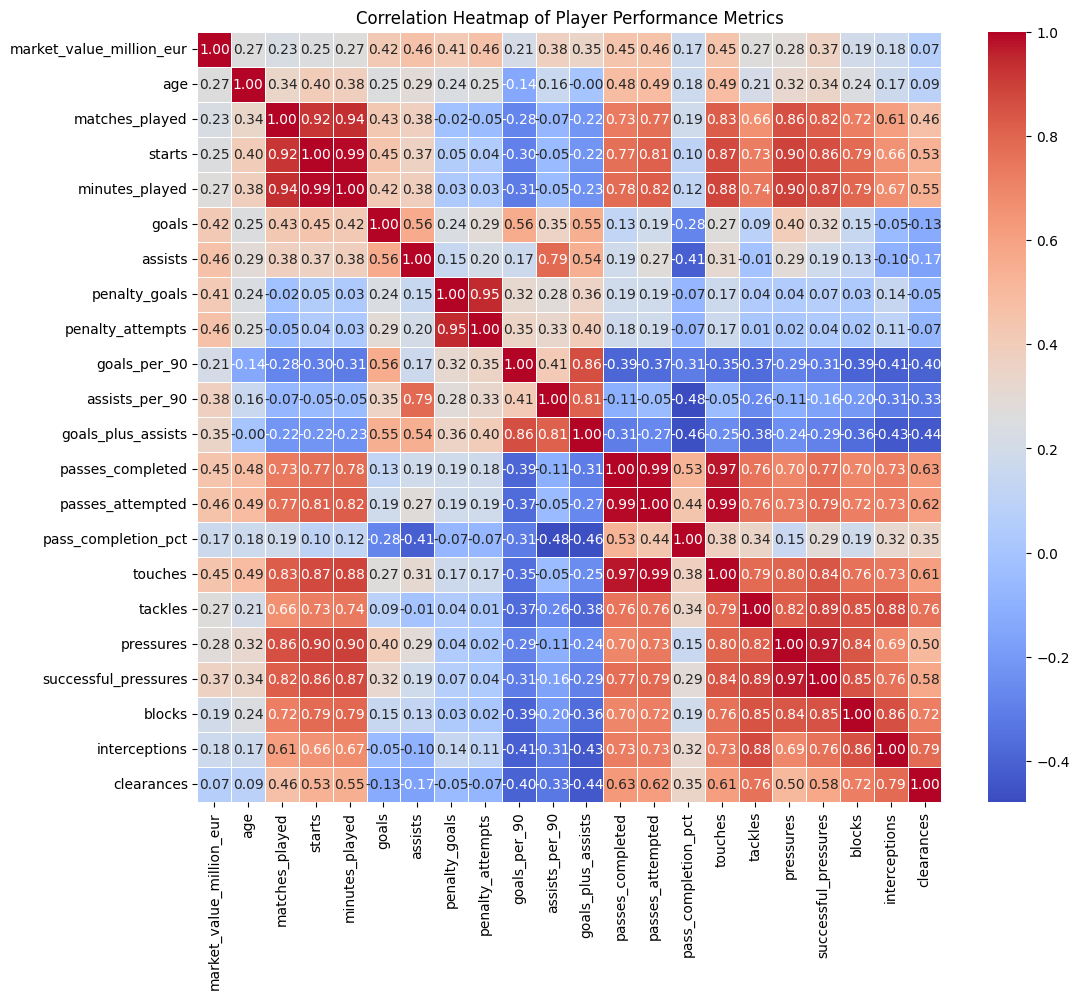

Index(['Name', 'market_value_million_eur', 'nationality', 'position', 'club',
       'league', 'age', 'matches_played', 'starts', 'minutes_played', 'goals',
       'assists', 'penalty_goals', 'penalty_attempts', 'goals_per_90',
       'assists_per_90', 'goals_plus_assists', 'passes_completed',
       'passes_attempted', 'pass_completion_pct', 'touches', 'tackles',
       'pressures', 'successful_pressures', 'blocks', 'interceptions',
       'clearances'],
      dtype='object')

In [78]:

# Select only numeric columns 
numeric_df = merged_df.select_dtypes(include='number')

# Compute correlation matrix
corr = numeric_df.corr()

# Plot heatmap
plt.figure(figsize=(12,10))
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap of Player Performance Metrics')
plt.show()
merged_df.columns


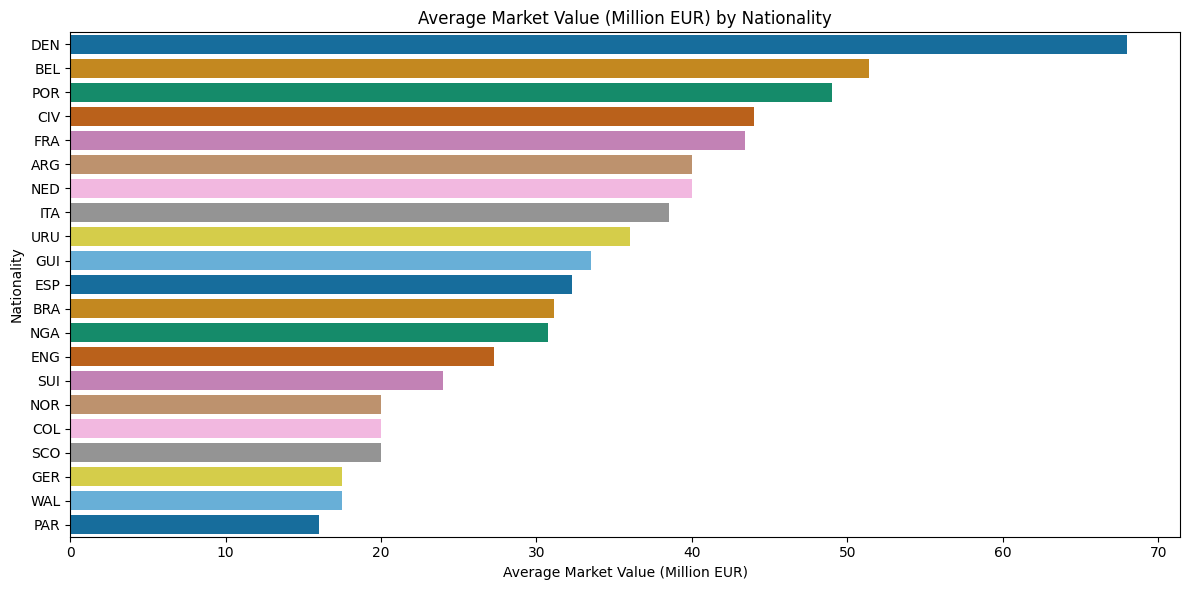

In [95]:
avg_df = avg_market_value.reset_index()
avg_df.columns = ['nationality', 'avg_market_value']

plt.figure(figsize=(12,6))
sns.barplot(data=avg_df, x='avg_market_value', y='nationality', hue='nationality', dodge=False, palette='colorblind', legend=False)
plt.title('Average Market Value (Million EUR) by Nationality')
plt.xlabel('Average Market Value (Million EUR)')
plt.ylabel('Nationality')
plt.tight_layout()
plt.show()

Explanation:

In this project, data wrangling began by loading two separate datasets containing player statistics from different time periods and cleaning them to ensure consistency. For the most recent data, we filtered to retain only midfielders, dropped redundant and irrelevant columns to reduce noise, and adjusted floats by doubling where appropriate to compensate for 2 vs 1 season datasets. The  dataset (2017-2019) underwent similar cleaning steps including standardizing column names, correcting typos, filtering for Premier League midfielders, and converting market values from string to float for numeric analysis. After these preparations, both datasets were merged on player names to create a unified dataframe for analysis that contained the best metrics from both datasets. Exploratory Data Analysis (EDA) focused on understanding relationships between performance metrics and market value, using correlation calculations, barplots for top correlated features, and heatmaps to visualize the overall correlation structure. Additionally, we examined qualitative variables such as nationality by summing average market values and visualizing them via bar plots to uncover potential patterns in player valuations across different countries. This structured approach ensured the data was tidy, consistent, and ready for meaningful insights. In future, we plan to proceed using regression techniques to identify feature weights. Using such feature weights, we can start to develop a scouting model which predicts player market value using their stats.

Analysis:
So far these are the factors most highly correlated with market value: penalty_attempts, assists, passes_attempted, passes_completed, touches, goals, penalty_goals, assists_per_90, successful_pressures, goals_plus_assists.

Many of the features here are collinear, meaning they provide redundant information. To avoid redundancy, we plan to refine our features to focus on the most meaningful and distinct metrics. Beyond the obvious indicators of strong midfielder performance (i.e goals, assists, and passes completed) we observed that features like penalty goals and touches also rank highly in importance. We believe this is because top-tier midfielders are often the designated penalty takers for their teams, which inflates the correlation between penalty goals and overall market value. Similarly, a high number of touches suggests that a midfielder is frequently involved in play, typically receiving the ball often due to their team's dominance and strong overall performance. This context helps explain why these features are significant in our analysis, even if they might initially seem less directly related to general performance.


# Ethics & Privacy

All variables in our merged dataset are drawn from open, publicly posted sources (Kaggle CSVs that themselves scrape match statistics from the Premier-League website and crowdsourced market prices from Transfermarkt and the official FPL API). We will store raw files in a private Git-repo, publish only aggregated or model-ready tables, and respect each site’s non-commercial licence when downloading updates.

The larger ethical challenge is bias in the two target variables. Transfermarkt valuations are crowd-edited and have been shown to underrate defenders, goalkeepers, and players from lower-profile nationalities; FPL prices embed the game designers’ scoring heuristics, thereby privileging goal involvement over less visible defensive work. These systematic skews could make our models appear accurate while merely reproducing community bias. Moreover, we will be limiting our market value prediction based only on attacking statistics such as goals scored and shooting accuracy. This may be biased against players who perform in the defender position. However, we will only compare the market value for attackers and midfielders. To surface such issues we will:

* examine model residuals by position, nationality group, and age band; a pattern of under- or over-prediction in any subgroup will be explicitly reported.
* compute mean-absolute-error gaps across those subgroups and include them in the results table.
* state in the paper that outputs are descriptive of Transfermarkt/FPL perceptions, not “true” player worth, and should not be used for hiring, wage, or contract decisions.

By limiting ourselves to public performance data, honouring source licences, and auditing residuals for subgroup error, we address privacy obligations while making the model’s potential biases visible and interpretable.

# Team Expectations 

- Primary channels – We will use a dedicated Messenger group chat for quick updates and questions, with a weekly Zoom call (30 min, Fridays 5 PM) for progress checks and task-planning. Important files and deadlines will be mirrored in a shared Google Drive folder and posted to the Canvas discussion thread as a backup so nothing gets lost.

- Response time – Everyone agrees to acknowledge messages within 24 hours on weekdays; if someone anticipates being unavailable they will post a heads-up.

- Work allocation – Coding, writing, and literature search will be divided so every member contributes to each area, but weights can vary with comfort and skill. We will revisit the task list during the weekly call to rebalance workloads when needed.

- Feedback style – Direct, constructive critique is welcome, but comments must stay respectful and specific rather than personal.

- Conflict resolution – First, raise the issue privately with the teammate concerned; if unresolved, bring it to the next Zoom call for group discussion. Persistent problems will be taken forward to the instructional staff.

- Commitment – By adding our names to the project submission we confirm that we have read the COGS 108 Team Policies, accept the expectations above, and intend to contribute reliably throughout the quarter.

# Project Timeline Proposal

| Meeting Date  | Meeting Time| Completed Before Meeting  | Discuss at Meeting |
|---|---|---|---|
| 4/30  |  4 PM | Read COGS 108 policies and rubric; Brainstormed topics  | Picked final topic (EPL player desirability via performance metrics); opened Google Drive & Messenger group; drafted research question and hypothesis | 
| 5/8  |  5 PM | Make sure everyone is up to speed with the datasets; brainstorm ideas for data anlysis | Discuss strategy and method to analyze data effectively; divide tasks for data wrangling | 
| 5/14  | 5 PM  | Finish up data wrangling; Stats dataset (Karthik, Orlev, Akshat); Market value dataset (Vishnu, Shaan) | Finalize strategy for analysis and discuss prediction methods; Divide tasks for EDA |
| 5/22  | 6 PM  | Finish up EDA; start working on prediction | Review/Edit wrangling/EDA; Discuss plan for predicting market value |
| 5/28  | 12 PM  | Finalize wrangling/EDA (Shaan, Orlev, Akshat); Begin prediction analysis (Vishnu, Karthik) | Complete project check-in |
| 6/3  | 12 PM  | Complete analysis; Draft results/conclusion/discussion (Everyone)| Discuss/edit full project |
| 6/11  | 11 AM  | NA | Turn in Final Project & Group Project Surveys |